# Linear Regression



Modelo de Regressão Linear para predição de SCORE.


In [13]:
%run ../src/feature_engineering.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline
#Alterando configurações padrão dos plots
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
course_df = pd.read_csv('../data/preprocessed/edx_2014_train.csv',low_memory=False)
course_df.head(10)


,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,...,course_has_certification,course_subject,course_level,course_language,course_transcript_en,course_transcript_pt,course_transcript_es,course_transcript_de,course_transcript_cn,course_year
0,CB22x,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,...,NaN,History,Introductory,English,False,False,False,False,False,CB22x_2013
1,CS50x,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,...,True,Computer Science,Introductory,English,True,False,False,False,False,CS50x_2012
2,CB22x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,NaN,History,Introductory,English,False,False,False,False,False,CB22x_2013
3,CS50x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,True,Computer Science,Introductory,English,True,False,False,False,False,CS50x_2012
4,ER22x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,False,Humanities,Introductory,English,True,True,True,True,True,ER22x_2013
5,PH207x,MHxPC130275857,1,1,1,0,United States,NaN,NaN,NaN,...,NaN,Health & Safety,Intermediate,English,True,False,False,False,False,PH207x_2012
6,CB22x,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,...,NaN,History,Introductory,English,False,False,False,False,False,CB22x_2013
7,CB22x,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,NaN,History,Introductory,English,False,False,False,False,False,CB22x_2013
8,CS50x,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,True,Computer Science,Introductory,English,True,False,False,False,False,CS50x_2012
9,ER22x,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,False,Humanities,Introductory,English,True,True,True,True,True,ER22x_2013


In [4]:
course_df['course_id'].unique()

array(['CB22x', 'CS50x', 'ER22x', 'PH207x', '6.002x', '2.01x', '6.00x',
       '7.00x', '8.02x', '8.MReV'], dtype=object)

In [14]:
c1 = course_df[course_df['course_id'] == '6.00x']
feat = feature_extract(c1)
feat.head(10)

,viewed,explored,certified,LoE_DI,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,grade,gender_f,gender_m
298624,1,0,0,-1,-1,2.0,2.0,-1.0,-1.0,0,-1.0,0.0,0,0
298631,1,1,0,-1,-1,456.0,29.0,2.0,10.0,1,-1.0,0.0,0,0
298644,1,0,0,-1,-1,1.0,2.0,6.0,1.0,0,-1.0,0.0,0,0
298645,1,0,0,-1,-1,8.0,3.0,1.0,1.0,0,-1.0,0.0,0,0
298652,1,0,0,-1,-1,191.0,4.0,29.0,5.0,0,-1.0,0.0,0,0
298667,1,0,0,-1,-1,17.0,2.0,-1.0,2.0,0,-1.0,0.0,0,0
298671,1,0,0,-1,-1,9.0,1.0,1.0,2.0,0,-1.0,0.0,0,0
298675,1,0,0,-1,-1,11.0,1.0,2.0,2.0,0,-1.0,-1.0,0,0
298678,1,0,0,-1,-1,154.0,2.0,17.0,2.0,0,-1.0,0.0,0,0
298684,1,0,0,-1,-1,5.0,5.0,-1.0,-1.0,0,-1.0,0.0,0,0


In [15]:
norm_feat = normalize(feat)
norm_feat.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.267261,0.000000,0.0,-0.267261,-0.267261,0.534522,0.534522,-0.267261,-0.267261,0.000000,-0.267261,0.000000,0.0,0.0
1,0.002188,0.002188,0.0,-0.002188,-0.002188,0.997721,0.063452,0.004376,0.021880,0.002188,-0.002188,0.000000,0.0,0.0
2,0.147442,0.000000,0.0,-0.147442,-0.147442,0.147442,0.294884,0.884652,0.147442,0.000000,-0.147442,0.000000,0.0,0.0
3,0.112509,0.000000,0.0,-0.112509,-0.112509,0.900070,0.337526,0.112509,0.112509,0.000000,-0.112509,0.000000,0.0,0.0
4,0.005173,0.000000,0.0,-0.005173,-0.005173,0.988073,0.020693,0.150022,0.025866,0.000000,-0.005173,0.000000,0.0,0.0
5,0.057544,0.000000,0.0,-0.057544,-0.057544,0.978240,0.115087,-0.057544,0.115087,0.000000,-0.057544,0.000000,0.0,0.0
6,0.104828,0.000000,0.0,-0.104828,-0.104828,0.943456,0.104828,0.104828,0.209657,0.000000,-0.104828,0.000000,0.0,0.0
7,0.086066,0.000000,0.0,-0.086066,-0.086066,0.946729,0.086066,0.172133,0.172133,0.000000,-0.086066,-0.086066,0.0,0.0
8,0.006453,0.000000,0.0,-0.006453,-0.006453,0.993714,0.012905,0.109696,0.012905,0.000000,-0.006453,0.000000,0.0,0.0
9,0.133631,0.000000,0.0,-0.133631,-0.133631,0.668153,0.668153,-0.133631,-0.133631,0.000000,-0.133631,0.000000,0.0,0.0


In [16]:
feat = feature_extract(c1)

X.head(10)

,viewed,explored,certified,LoE_DI,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,gender_f,gender_m
298624,1,0,0,-1,-1,2.0,2.0,-1.0,-1.0,0,-1.0,0,0
298631,1,1,0,-1,-1,456.0,29.0,2.0,10.0,1,-1.0,0,0
298644,1,0,0,-1,-1,1.0,2.0,6.0,1.0,0,-1.0,0,0
298645,1,0,0,-1,-1,8.0,3.0,1.0,1.0,0,-1.0,0,0
298652,1,0,0,-1,-1,191.0,4.0,29.0,5.0,0,-1.0,0,0
298667,1,0,0,-1,-1,17.0,2.0,-1.0,2.0,0,-1.0,0,0
298671,1,0,0,-1,-1,9.0,1.0,1.0,2.0,0,-1.0,0,0
298675,1,0,0,-1,-1,11.0,1.0,2.0,2.0,0,-1.0,0,0
298678,1,0,0,-1,-1,154.0,2.0,17.0,2.0,0,-1.0,0,0
298684,1,0,0,-1,-1,5.0,5.0,-1.0,-1.0,0,-1.0,0,0


In [17]:
X_train, X_test, X_val,  y_train, y_test, y_val = train_test_val_split(X, y, test_size=0.25, random_state=42)

In [181]:
{ 'X': X.shape, 'y': y.shape,
 'X_train': X_train.shape, 'y_train': y_train.shape, 
 'X_test': X_test.shape, 'y_test': X_test.shape, 
 'X_val': X_val.shape, 'y_val': y_val.shape}

{'X': (57715, 13),
 'X_test': (10822, 13),
 'X_train': (32464, 13),
 'X_val': (14429, 13),
 'y': (57715, 1),
 'y_test': (10822, 13),
 'y_train': (32464, 1),
 'y_val': (14429, 1)}

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [183]:
model.score(X_train, y_train)

0.5002633945300863

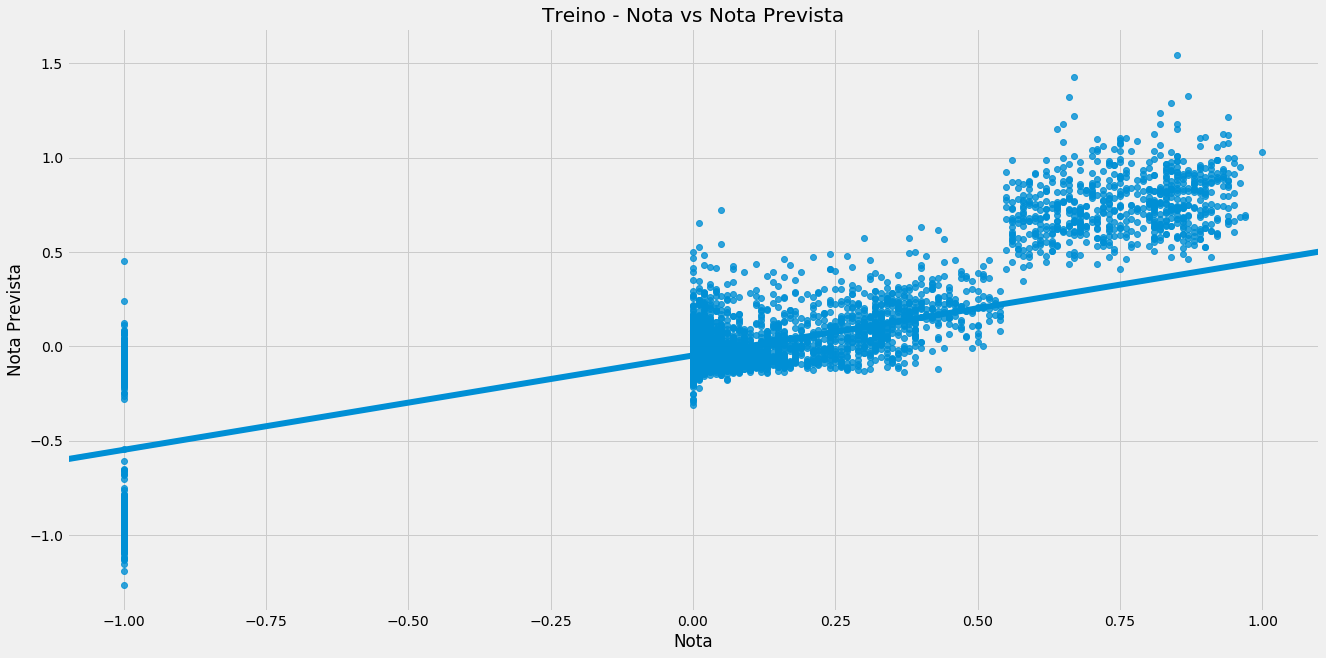

In [199]:
pred_train = model.predict(X_train)

data_train = pd.DataFrame(pred_train )
data_train['x'] = y_train['grade'].values
data_train['y'] = data_train[0]

sns.regplot(x='x', y='y', data=data_train)


#Definindo título
plt.title('Treino - Nota vs Nota Prevista')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Nota')
plt.ylabel('Nota Prevista')
#Exibindo gráfico

plt.show()

In [193]:
model.score(X_test, y_test)

0.5027959602317865

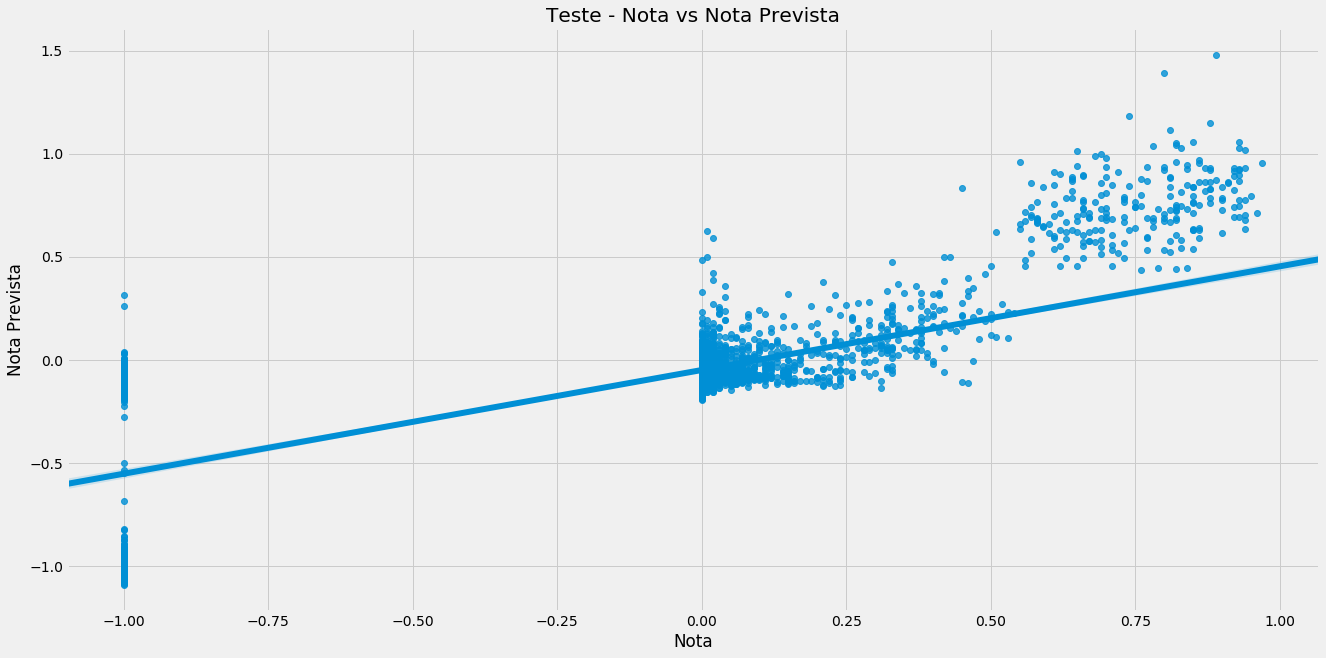

In [208]:
pred_test = model.predict(X_test)

data_test = pd.DataFrame(pred_test)
data_test['x'] = y_test['grade'].values
data_test['y'] = data_test[0]

sns.regplot(x='x', y='y', data=data_test)

#Definindo título
plt.title('Teste - Nota vs Nota Prevista')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('Nota')
plt.ylabel('Nota Prevista')

plt.show()


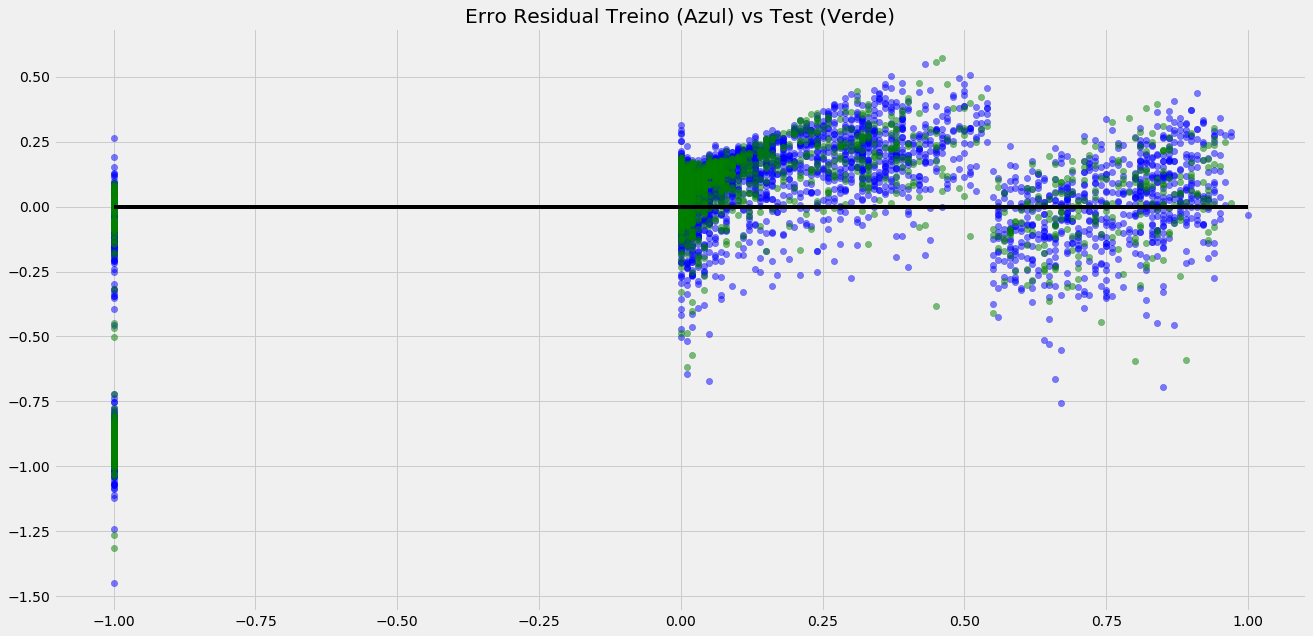

In [206]:
plt.scatter(data_train['x'], data_train['x'] - data_train['y'], c='b', s=40, alpha=0.5)
plt.scatter(data_test['x'], data_test['x'] - data_test['y'], c='g', s=40, alpha=0.5)
plt.hlines(y=0, xmin=-1, xmax=1)
plt.title('Erro Residual Treino (Azul) vs Test (Verde)')
plt.show()

In [217]:
print ("Média de Erro ao Quadrado (MSE) nos dados de treinamento", 
      np.mean((data_train['y'] - data_train['x']) ** 2))
print ("Média de Erro ao Quadrado (MSE) nos dados de testes:", 
      np.mean((data_test['y'] - data_test['x']) ** 2))

Média de Erro ao Quadrado (MSE) nos dados de treinamento 0.06484798255171309
Média de Erro ao Quadrado (MSE) nos dados de testes: 0.06268066789438316


In [ ]:

course_df = pd.read_csv('../data/preprocessed/edx_2014_train.csv',low_memory=False)

results = {}
plots = []
flatten = lambda l: [item for sublist in l for item in sublist]

courses = course_df['course_id'].unique()
for i, course_id in enumerate(courses):
    course = course_df[course_df['course_id'] == course_id]
    course = feature_extract(course)
    X, y = split_xy(course)
    #X = normalize(X)
    
    
    X_train, X_test, X_val,  y_train, y_test, y_val = train_test_val_split(X, y, test_size=0.4, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    pred_test = np.array(flatten(model.predict(X_test)))
    
    plt.subplot(len(courses), 2, (i+1) + i)
    scatter_real_vs_pred_subplot(plt, y_test['grade'].values, pred_test, title=course_id+" - Real x Pred")
    
    plt.subplot(len(courses), 2, (i+1) + (i+1))
    scatter_residual_error_subplot(plt, y_test['grade'].values, pred_test, title=course_id+" - Erro Residual")
    
    results[course_id] = regression_evaluation(pred_test, y_test)
        
plt.show()